# **Time Series**

## **Data Time Series NO2 daerah Bangkalan**
Satelit Sentinel-5P (TROPOMI) dari program Copernicus digunakan untuk memantau kualitas udara global, khususnya konsentrasi gas-gas seperti nitrogen dioksida (NO₂), karbon monoksida (CO), ozon (O₃), dan metana (CH₄).
Gas NO₂ merupakan indikator utama polusi udara yang berasal dari aktivitas manusia seperti kendaraan bermotor, industri, dan pembakaran bahan bakar fosil.

Wilayah bangkalan dipilih sebagai area pengamatan untuk menganalisis dinamika NO₂ selama periode 2022:–2025.

In [1]:
pip install openeo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 5/6 [openeo]ted]  WARNING: The script openeo-auth is installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [openeo]2m5/6 [openeo]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
    pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 44.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import openeo
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from openeo.rest.datacube import Polygon
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from sklearn.neighbors import LocalOutlierFactor

In [3]:
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=WMTF-KGGM 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


In [4]:
aoi = {
    "type": "Polygon",
    "coordinates": [
        [
            [112.76899595080619, -7.019806638755355],  # Titik 1 (Timur Laut)
            [112.72040940932828, -7.019806638755355],  # Titik 2 (Barat Laut)
            [112.72040940932828, -7.06499820241666],   # Titik 3 (Barat Daya)
            [112.76899595080619, -7.06499820241666],   # Titik 4 (Tenggara)
            [112.76899595080619, -7.019806638755355],  # Kembali ke Titik 1
        ]
    ],
}


In [5]:
# Mengambil data NO2 Sentinel-5P berdasarkan AOI dan rentang waktu
s5p_no2 = connection.load_collection(
    "SENTINEL_5P_L2",
    temporal_extent=["2022-10-19", "2025-10-19"],
    spatial_extent={
        "west": 112.72040940932828,
        "south": -7.06499820241666,
        "east": 112.76899595080619,
        "north": -7.019806638755355,
    },
    bands=["NO2"],
)

In [6]:
s5p_no2_daily = s5p_no2.aggregate_temporal_period(
    period="day",
    reducer="mean"
)

# Agregasi spasial: rata-rata di dalam area poligon
s5p_no2_avg = s5p_no2_daily.aggregate_spatial(
    reducer="mean",
    geometries=aoi
)

# Eksekusi batch job dan simpan hasilnya ke file CSV
job = s5p_no2_avg.execute_batch(
    title="NO2 Harian di Bangkalan (2022–2025)",
    outputfile="no2_bangkalan_timeseries.csv",
    format="CSV"
)

0:00:00 Job 'j-2511010117234333b3b8db0c4f2a187c': send 'start'
0:00:13 Job 'j-2511010117234333b3b8db0c4f2a187c': created (progress 0%)
0:00:19 Job 'j-2511010117234333b3b8db0c4f2a187c': created (progress 0%)
0:00:25 Job 'j-2511010117234333b3b8db0c4f2a187c': created (progress 0%)
0:00:33 Job 'j-2511010117234333b3b8db0c4f2a187c': created (progress 0%)
0:00:43 Job 'j-2511010117234333b3b8db0c4f2a187c': created (progress 0%)
0:00:56 Job 'j-2511010117234333b3b8db0c4f2a187c': running (progress N/A)
0:01:11 Job 'j-2511010117234333b3b8db0c4f2a187c': running (progress N/A)
0:01:31 Job 'j-2511010117234333b3b8db0c4f2a187c': running (progress N/A)
0:01:55 Job 'j-2511010117234333b3b8db0c4f2a187c': running (progress N/A)
0:02:25 Job 'j-2511010117234333b3b8db0c4f2a187c': running (progress N/A)
0:03:02 Job 'j-2511010117234333b3b8db0c4f2a187c': running (progress N/A)
0:03:49 Job 'j-2511010117234333b3b8db0c4f2a187c': running (progress N/A)
0:04:48 Job 'j-2511010117234333b3b8db0c4f2a187c': running (progres

In [7]:
# Buat folder dan unduh hasil job ke sana
job.get_results().download_files(target="results/")

# Cari file CSV di folder results
csv_file = glob.glob("results/*.csv")[0]

# Baca dan tampilkan
df_no2 = pd.read_csv(csv_file)
print(df_no2)

                          date  feature_index       NO2
0     2023-01-11T00:00:00.000Z              0  0.000025
1     2023-01-12T00:00:00.000Z              0  0.000030
2     2023-01-14T00:00:00.000Z              0  0.000017
3     2023-01-15T00:00:00.000Z              0       NaN
4     2023-01-17T00:00:00.000Z              0  0.000025
...                        ...            ...       ...
1092  2025-10-09T00:00:00.000Z              0  0.000026
1093  2025-10-13T00:00:00.000Z              0       NaN
1094  2025-10-10T00:00:00.000Z              0  0.000049
1095  2025-10-07T00:00:00.000Z              0  0.000024
1096  2025-10-08T00:00:00.000Z              0  0.000044

[1097 rows x 3 columns]


## **Processing Data**

Jumlah missing values sebelum interpolasi:
date               0
feature_index      0
NO2              639
dtype: int64

✅ Data setelah interpolasi tersimpan sebagai 'no2_bangkalan_timeseries_clean.csv'
                         date  feature_index       NO2
187 2022-10-18 00:00:00+00:00              0  0.000028
186 2022-10-19 00:00:00+00:00              0  0.000028
185 2022-10-20 00:00:00+00:00              0  0.000028
184 2022-10-21 00:00:00+00:00              0  0.000028
188 2022-10-22 00:00:00+00:00              0  0.000028


/tmp/ipykernel_5901/940646867.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_no2['NO2'] = df_no2['NO2'].fillna(method='bfill').fillna(method='ffill')


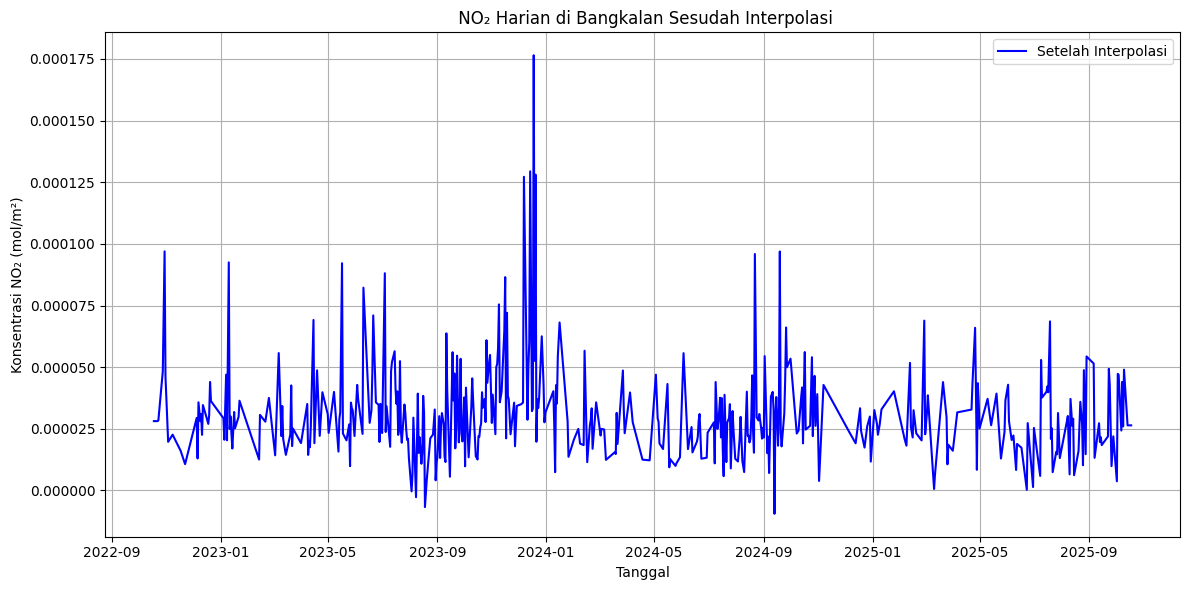

In [14]:
# Membaca file CSV hasil dari openEO
df_no2 = pd.read_csv("no2_bangkalan_timeseries.csv")

# Pastikan kolom tanggal dan urutkan
df_no2['date'] = pd.to_datetime(df_no2['date'])
df_no2 = df_no2.sort_values('date')

# Cek missing values
print("Jumlah missing values sebelum interpolasi:")
print(df_no2.isna().sum())

# Interpolasi linear untuk mengisi missing values
df_no2['NO2'] = df_no2['NO2'].interpolate(method='linear')

# Isi sisa NaN di awal/akhir dengan nilai terdekat
df_no2['NO2'] = df_no2['NO2'].fillna(method='bfill').fillna(method='ffill')

# Simpan hasil data bersih ke file baru
df_no2.to_csv("no2_bangkalan_timeseries_clean.csv", index=False)

print("\n✅ Data setelah interpolasi tersimpan sebagai 'no2_bangkalan_timeseries_clean.csv'")
print(df_no2.head())

# Visualisasi sebelum dan sesudah interpolasi

plt.figure(figsize=(12,6))
plt.plot(df_no2['date'], df_no2['NO2'], label='Setelah Interpolasi', color='blue')

plt.title(" NO₂ Harian di Bangkalan Sesudah Interpolasi")
plt.xlabel("Tanggal")
plt.ylabel("Konsentrasi NO₂ (mol/m²)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Deteksi outlier dengan LOF**

Jumlah outlier terdeteksi (LOF): 55
                         date  feature_index       NO2  Outlier
12  2022-10-30 00:00:00+00:00              0  0.000097     True
83  2023-01-09 00:00:00+00:00              0  0.000056     True
84  2023-01-10 00:00:00+00:00              0  0.000092     True
105 2023-01-31 00:00:00+00:00              0  0.000027     True
211 2023-05-17 00:00:00+00:00              0  0.000092     True

✅ Data tanpa outlier tersimpan sebagai 'no2_bangkalan_no_outlier.csv'


/tmp/ipykernel_5901/3841115056.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_no2['NO2'] = df_no2['NO2'].fillna(method='bfill').fillna(method='ffill')


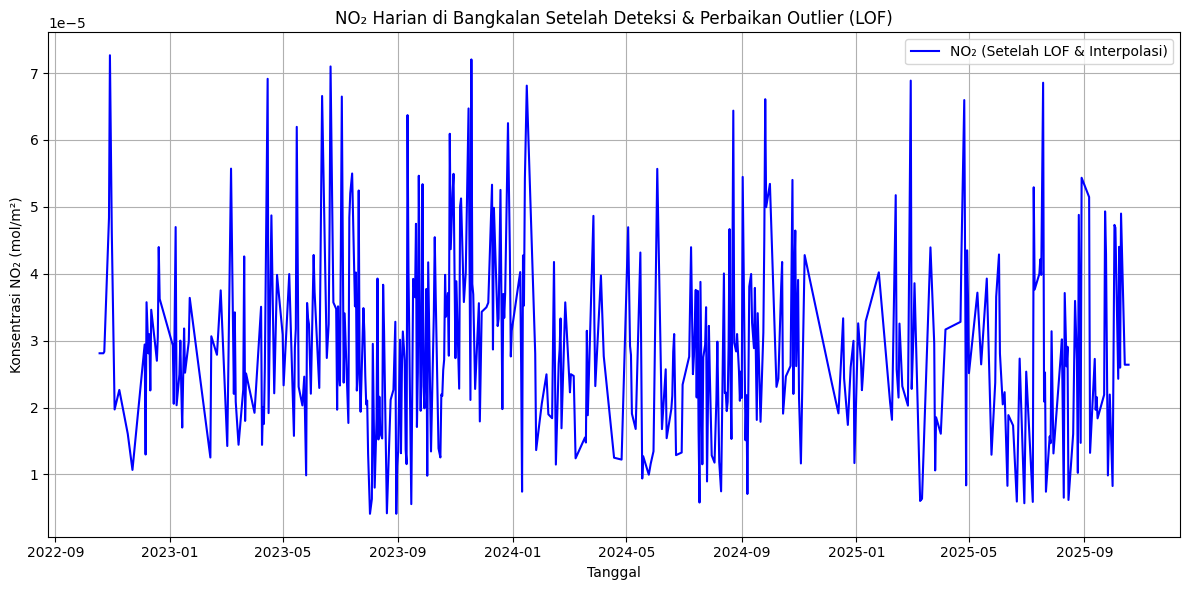

In [21]:
# --- 1. Baca data hasil interpolasi ---
df_no2 = pd.read_csv("no2_bangkalan_timeseries_clean.csv")
df_no2['date'] = pd.to_datetime(df_no2['date'])

# --- 2. Deteksi outlier dengan LOF ---
# LOF cocok untuk data univariat/time series juga (kita gunakan NO2 sebagai fitur tunggal)
X = df_no2[['NO2']].values

# n_neighbors menentukan sensitivitas (biasanya 10–20)
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.05)  # 5% data dianggap outlier
y_pred = lof.fit_predict(X)

# Label LOF: -1 = outlier, 1 = normal
df_no2['Outlier'] = (y_pred == -1)

# --- 3. Tampilkan hasil deteksi ---
jumlah_outlier = df_no2['Outlier'].sum()
print(f"Jumlah outlier terdeteksi (LOF): {jumlah_outlier}")
print(df_no2[df_no2['Outlier'] == True].head())

# --- 4. Ganti nilai outlier ---
# Gantikan nilai NO2 yang outlier dengan NaN agar bisa diisi ulang
df_no2.loc[df_no2['Outlier'], 'NO2'] = np.nan

# Interpolasi linear untuk mengganti nilai yang dihapus
df_no2['NO2'] = df_no2['NO2'].interpolate(method='linear')

# Jika masih ada NaN di ujung, isi dengan nilai terdekat
df_no2['NO2'] = df_no2['NO2'].fillna(method='bfill').fillna(method='ffill')

# --- 5. Simpan hasil bersih ---
df_no2.to_csv("no2_bangkalan_no_outlier.csv", index=False)

print("\n✅ Data tanpa outlier tersimpan sebagai 'no2_bangkalan_no_outlier.csv'")

# --- 6. Visualisasi hasil ---
plt.figure(figsize=(12,6))
plt.plot(df_no2['date'], df_no2['NO2'], label='NO₂ (Setelah LOF & Interpolasi)', color='blue')
plt.title("NO₂ Harian di Bangkalan Setelah Deteksi & Perbaikan Outlier (LOF)")
plt.xlabel("Tanggal")
plt.ylabel("Konsentrasi NO₂ (mol/m²)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Data Supervised**
Data supervised adalah bentuk data yang sudah memiliki fitur input (X) dan target output (y).
Dalam konteks time series (seperti data NO₂ harian), kita membentuk data supervised agar model bisa memprediksi nilai masa depan berdasarkan data sebelumnya.

In [22]:
# Membaca data hasil interpolasi
df_no2 = pd.read_csv("no2_bangkalan_no_outlier.csv")

# Pastikan urut berdasarkan tanggal
df_no2['date'] = pd.to_datetime(df_no2['date'])
df_no2 = df_no2.sort_values('date')

# --- Atur jumlah lag (berapa hari sebelumnya yang dijadikan input) ---
n_lags = 30

# --- Membentuk fitur lag ---
for i in range(1, n_lags + 1):
    df_no2[f'NO2_t-{i}'] = df_no2['NO2'].shift(i)

# --- Kolom target (nilai NO2 hari ini) ---
df_supervised = df_no2.dropna().reset_index(drop=True)

# Simpan hasilnya
df_supervised.to_csv("no2_bangkalan_supervised.csv", index=False)

print("✅ Data supervised berhasil dibuat dan disimpan sebagai 'no2_bangkalan_supervised.csv'")
print(df_supervised.head())

✅ Data supervised berhasil dibuat dan disimpan sebagai 'no2_bangkalan_supervised.csv'
                       date  feature_index       NO2  Outlier   NO2_t-1  \
0 2022-11-17 00:00:00+00:00              0  0.000016    False  0.000017   
1 2022-11-18 00:00:00+00:00              0  0.000015    False  0.000016   
2 2022-11-19 00:00:00+00:00              0  0.000014    False  0.000015   
3 2022-11-20 00:00:00+00:00              0  0.000013    False  0.000014   
4 2022-11-21 00:00:00+00:00              0  0.000012    False  0.000013   

    NO2_t-2   NO2_t-3   NO2_t-4   NO2_t-5   NO2_t-6  ...  NO2_t-21  NO2_t-22  \
0  0.000018  0.000018  0.000019  0.000020  0.000020  ...  0.000044  0.000040   
1  0.000017  0.000018  0.000018  0.000019  0.000020  ...  0.000048  0.000044   
2  0.000016  0.000017  0.000018  0.000018  0.000019  ...  0.000073  0.000048   
3  0.000015  0.000016  0.000017  0.000018  0.000018  ...  0.000059  0.000073   
4  0.000014  0.000015  0.000016  0.000017  0.000018  ...  0.000

<Figure size 1000x500 with 0 Axes>

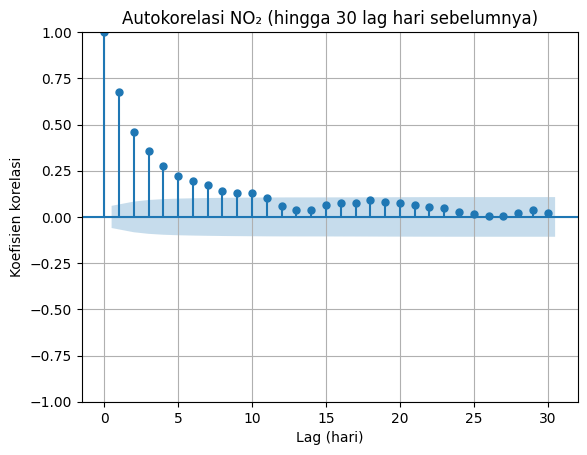

📈 Nilai Autokorelasi NO₂ (1–30 hari sebelumnya):
    Lag  Autocorrelation
0     1         0.674459
1     2         0.457356
2     3         0.357353
3     4         0.272986
4     5         0.220685
5     6         0.194257
6     7         0.170627
7     8         0.141753
8     9         0.129379
9    10         0.131973
10   11         0.102713
11   12         0.060390
12   13         0.035848
13   14         0.039784
14   15         0.062166
15   16         0.075805
16   17         0.074907
17   18         0.090110
18   19         0.079743
19   20         0.074219
20   21         0.063985
21   22         0.053019
22   23         0.046429
23   24         0.027541
24   25         0.016974
25   26         0.006165
26   27         0.006230
27   28         0.021157
28   29         0.036741
29   30         0.023748
📈 Nilai Autokorelasi NO₂ (lag dengan korelasi > 0.25):
   Lag  Autocorrelation
0    1         0.674459
1    2         0.457356
2    3         0.357353
3    4         0.272986


In [23]:
# --- Plot autokorelasi ---
plt.figure(figsize=(10, 5))
plot_acf(df_supervised['NO2'], lags=30)
plt.title("Autokorelasi NO₂ (hingga 30 lag hari sebelumnya)")
plt.xlabel("Lag (hari)")
plt.ylabel("Koefisien korelasi")
plt.grid(True)
plt.show()

# --- Hitung nilai autokorelasi secara numerik ---
acf_values = acf(df_supervised['NO2'], nlags=30)
lag_range = list(range(1, 31))

# Buat DataFrame autokorelasi
df_acf = pd.DataFrame({
    "Lag": lag_range,
    "Autocorrelation": acf_values[1:]  # abaikan lag=0
})

# Tampilkan hasilnya
print("📈 Nilai Autokorelasi NO₂ (1–30 hari sebelumnya):")
print(df_acf)

# --- Ambil lag dengan autokorelasi di atas 0.25 ---
threshold = 0.25
df_acf_filtered = df_acf[df_acf["Autocorrelation"] > threshold]

print("📈 Nilai Autokorelasi NO₂ (lag dengan korelasi > 0.25):")
print(df_acf_filtered)

### **Normalisasi data**
Normalisasi dilakukan agar semua nilai berada dalam skala yang sama — ini penting karena algoritma seperti KNN, SVM, atau Neural Network sensitif terhadap perbedaan skala.

Tanpa normalisasi, fitur dengan skala besar (misal 1000) bisa mendominasi fitur lain (misal 0.1)

In [24]:
# 1 Baca data supervised
df_supervised = pd.read_csv("no2_bangkalan_supervised.csv")

# Hapus kolom waktu kalau ada
df_supervised = df_supervised.drop(columns=["date"], errors="ignore")

# --- 2 Hitung autokorelasi tiap lag (terhadap kolom NO2) ---
lags = [col for col in df_supervised.columns if col.startswith("NO2_t-")]

autocorr = []
for lag in lags:
    r = df_supervised["NO2"].corr(df_supervised[lag])
    autocorr.append(r)

df_acf = pd.DataFrame({"Lag": lags, "Autocorrelation": autocorr})

# --- 3 Pilih lag dengan autokorelasi > 0.25 ---
selected_lags = df_acf[df_acf["Autocorrelation"] > 0.25]["Lag"].tolist()

print("✅ Kolom lag yang dipakai (autokorelasi > 0.25):")
print(selected_lags)

# --- 4 Bentuk dataset akhir hanya dengan lag terpilih ---
X = df_supervised[selected_lags]
y = df_supervised["NO2"]

# --- 5 Normalisasi Min-Max ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Gabungkan kembali hasilnya
df_scaled = pd.DataFrame(X_scaled, columns=selected_lags)
df_scaled["NO2"] = y.values

# --- 6 (Opsional) Simpan hasil normalisasi ---
# df_scaled.to_csv("no2_bangkalan_selected_normalized.csv", index=False)

print("\n✅ Normalisasi selesai. Berikut 5 baris pertama hasilnya:")
print(df_scaled.head())

# --- 7 Tampilkan info tambahan ---
print("\n📊 Jumlah fitur terpilih:", len(selected_lags))


✅ Kolom lag yang dipakai (autokorelasi > 0.25):
['NO2_t-1', 'NO2_t-2', 'NO2_t-3', 'NO2_t-4']

✅ Normalisasi selesai. Berikut 5 baris pertama hasilnya:
    NO2_t-1   NO2_t-2   NO2_t-3   NO2_t-4       NO2
0  0.186710  0.197451  0.208193  0.218934  0.000016
1  0.175969  0.186710  0.197451  0.208193  0.000015
2  0.160094  0.175969  0.186710  0.197451  0.000014
3  0.144219  0.160094  0.175969  0.186710  0.000013
4  0.128344  0.144219  0.160094  0.175969  0.000012

📊 Jumlah fitur terpilih: 4


## **Modeling dengan K-NN regression**
KNN Regression adalah metode non-parametrik yang memprediksi nilai keluaran (target) berdasarkan kedekatan (similarity) antara data baru dengan data lama.
Berbeda dengan model yang mencari fungsi matematis, KNN hanya mengandalkan jarak antar data.

In [26]:
# --- 1. Import library ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 2. Gunakan data hasil normalisasi sebelumnya ---
df_model = df_scaled.copy()

# --- 3. Pisahkan fitur (X) dan target (y) ---
X = df_model.drop(columns=["NO2"])
y = df_model["NO2"]

# --- 4. Bagi data menjadi data latih dan uji (80:20) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# --- 5. Buat model KNN Regression ---
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# --- 6. Prediksi data uji ---
y_pred = knn.predict(X_test)

# --- 7. Evaluasi performa model ---
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluasi Model KNN Regression:")
print(f"MAPE : {mape:.2f}%")
print(f"MSE  : {mse:.6f}")
print(f"R²   : {r2:.4f}")

# --- 8. Gabungkan hasil aktual dan prediksi ke satu DataFrame ---
df_results = pd.DataFrame({
    "NO2_Aktual": y_test.values,
    "NO2_Prediksi": y_pred
}).reset_index(drop=True)

print("\n✅ Contoh 5 data pertama hasil prediksi:")
print(df_results.head())



📊 Evaluasi Model KNN Regression:
MAPE : 35.28%
MSE  : 0.000000
R²   : 0.3036

✅ Contoh 5 data pertama hasil prediksi:
   NO2_Aktual  NO2_Prediksi
0    0.000036      0.000035
1    0.000040      0.000039
2    0.000044      0.000042
3    0.000040      0.000045
4    0.000037      0.000032


📊 Hasil Eksperimen KNN Regression:
     K       MAPE           MSE        R2
0    1  38.445651  1.483449e-10  0.070009
1    2  35.650162  1.123012e-10  0.295971
2    3  35.284773  1.110815e-10  0.303618
3    4  33.619111  1.004307e-10  0.370388
4    5  34.058302  9.854084e-11  0.382236
5    6  34.937187  9.768940e-11  0.387574
6    7  34.585074  9.344278e-11  0.414197
7    8  34.376674  8.994564e-11  0.436121
8    9  34.449136  9.004140e-11  0.435520
9   10  34.040705  8.962638e-11  0.438122
10  11  34.027814  8.867491e-11  0.444087
11  12  33.970306  8.909575e-11  0.441449
12  13  33.897855  8.998551e-11  0.435871
13  14  33.946560  9.124539e-11  0.427972
14  15  33.942522  9.133194e-11  0.427430
15  16  33.906307  9.061939e-11  0.431897
16  17  34.165124  9.111212e-11  0.428808
17  18  34.131049  9.138770e-11  0.427080
18  19  33.898889  9.002085e-11  0.435649
19  20  33.613633  8.954610e-11  0.438625

✅ K terbaik: 11 (R² = 0.4441, MAPE = 34.03%)


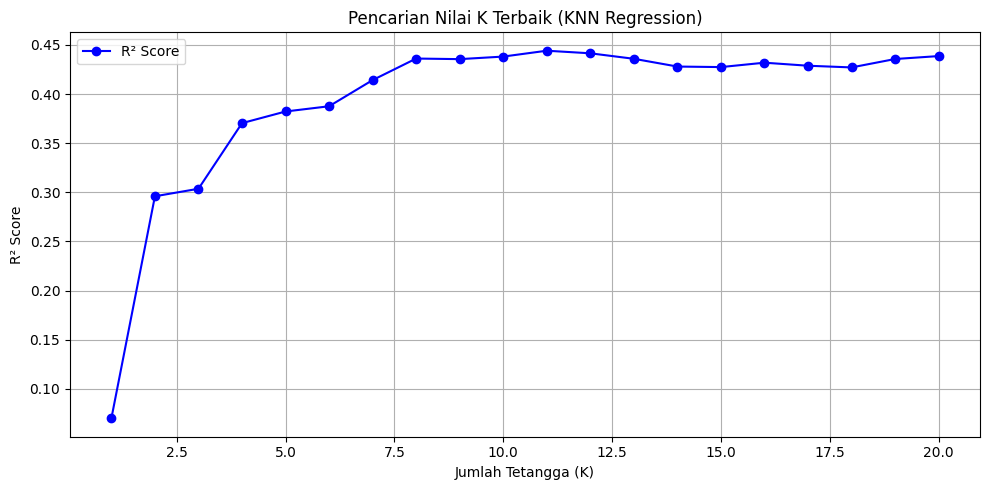

In [27]:
# --- 1. Import library ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 2. Gunakan dataset hasil normalisasi sebelumnya ---
df_model = df_scaled.copy()

# Pisahkan fitur dan target
X = df_model.drop(columns=["NO2"])
y = df_model["NO2"]

# --- 3. Bagi data menjadi data latih dan uji ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# --- 4. Cari K terbaik (dari 1 hingga 20 misalnya) ---
results = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"K": k, "MAPE": mape, "MSE": mse, "R2": r2})

# --- 5. Simpan hasil ke DataFrame ---
df_results = pd.DataFrame(results)

# --- 6. Cari K terbaik berdasarkan R² tertinggi ---
best_row = df_results.loc[df_results["R2"].idxmax()]
best_k = int(best_row["K"])

print("📊 Hasil Eksperimen KNN Regression:")
print(df_results)
print(f"\n✅ K terbaik: {best_k} (R² = {best_row['R2']:.4f}, MAPE = {best_row['MAPE']:.2f}%)")

# --- 7. Visualisasi hasil pencarian K ---
plt.figure(figsize=(10,5))
plt.plot(df_results["K"], df_results["R2"], marker='o', label="R² Score", color='blue')
plt.title("Pencarian Nilai K Terbaik (KNN Regression)")
plt.xlabel("Jumlah Tetangga (K)")
plt.ylabel("R² Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## **Air Quality Index Prediction**

✅ Hasil Klasifikasi Kualitas Udara Berdasarkan NO₂ (Ternormalisasi):
   NO2_Aktual  NO2_Prediksi Kategori_AQI
0    0.000036      0.000031         Good
1    0.000040      0.000032         Good
2    0.000044      0.000034         Good
3    0.000040      0.000039         Good
4    0.000037      0.000037         Good


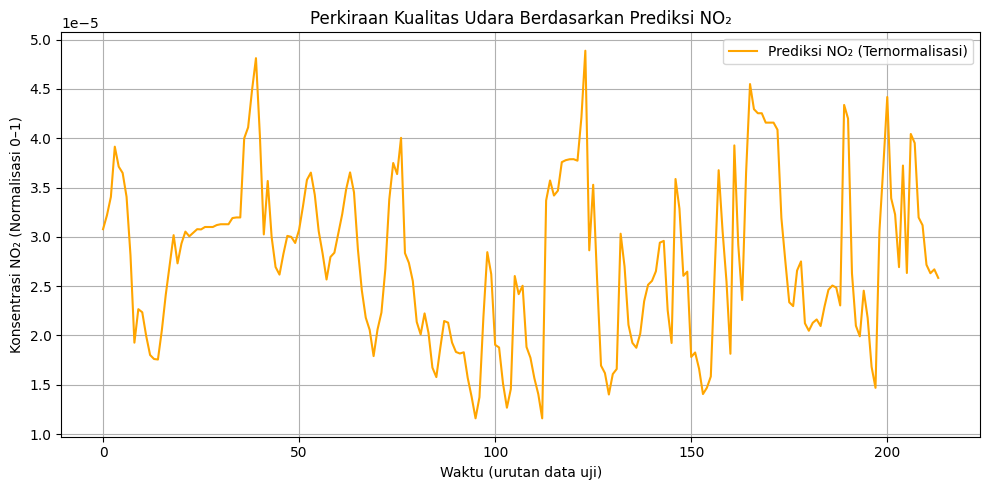


📊 Persentase Kategori Kualitas Udara:
Kategori_AQI
Good    100.0
Name: proportion, dtype: float64


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1️⃣ Buat DataFrame hasil prediksi ---
df_results = pd.DataFrame({
    "NO2_Aktual": y_test.values,   # nilai aktual dari data uji
    "NO2_Prediksi": y_pred         # hasil prediksi dari model KNN
})

# --- 2️⃣ Fungsi untuk klasifikasi berdasarkan NO2 ternormalisasi ---
def kategori_aqi_normalized(nilai):
    if nilai <= 0.25:
        return "Good"
    elif nilai <= 0.5:
        return "Moderate"
    elif nilai <= 0.75:
        return "Unhealthy for Sensitive Groups"
    elif nilai <= 1.0:
        return "Unhealthy"
    else:
        return "Very Unhealthy"

# --- 3️⃣ Tambahkan kolom kategori berdasarkan nilai prediksi ---
df_results["Kategori_AQI"] = df_results["NO2_Prediksi"].apply(kategori_aqi_normalized)

# --- 4️⃣ Tampilkan hasil ---
print("✅ Hasil Klasifikasi Kualitas Udara Berdasarkan NO₂ (Ternormalisasi):")
print(df_results.head())

# --- 5️⃣ Visualisasi hasil ---
plt.figure(figsize=(10,5))
plt.plot(df_results["NO2_Prediksi"], label='Prediksi NO₂ (Ternormalisasi)', color='orange')
plt.title("Perkiraan Kualitas Udara Berdasarkan Prediksi NO₂")
plt.xlabel("Waktu (urutan data uji)")
plt.ylabel("Konsentrasi NO₂ (Normalisasi 0–1)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- 6️⃣ (Opsional) Hitung proporsi kategori ---
kategori_persen = df_results["Kategori_AQI"].value_counts(normalize=True) * 100
print("\n📊 Persentase Kategori Kualitas Udara:")
print(kategori_persen.round(2))


📊 Evaluasi Model KNN Regression (Denormalisasi):
MAPE : 0.01%
MSE  : 0.000000
R²   : 0.4441

✅ Hasil Klasifikasi Kualitas Udara Berdasarkan NO₂ (Denormalisasi):
   NO2_Aktual  NO2_Prediksi Kategori_AQI
0    0.000004      0.000004         Good
1    0.000004      0.000004         Good
2    0.000004      0.000004         Good
3    0.000004      0.000004         Good
4    0.000004      0.000004         Good


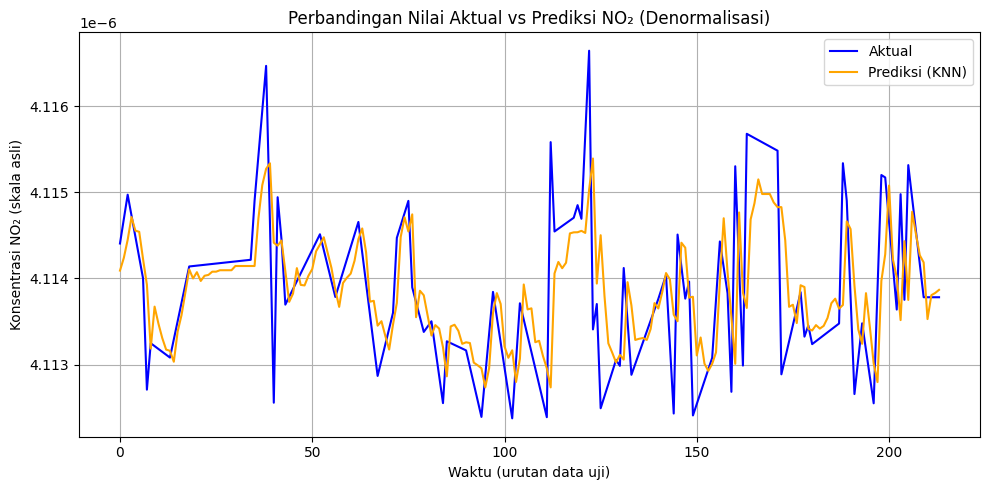

In [29]:
# --- 1. Prediksi data aktual ---


# --- 2. Baca data hasil normalisasi dan data asli ---
df_model = df_scaled.copy()  # data yang sudah dinormalisasi (fitur terpilih)
df_asli = pd.read_csv("no2_bangkalan_supervised.csv")  # data aslinya

# --- 3. Pisahkan fitur (X) dan target (y) ---
X = df_model.drop(columns=["NO2"])
y = df_model["NO2"]

# --- 4. Split data (80:20) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# --- 5. Buat model KNN dengan K terbaik ---
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)

# --- 6. Prediksi data uji ---
y_pred = knn.predict(X_test)

# --- 7. Denormalisasi hasil menggunakan data asli ---
scaler_y = MinMaxScaler()
scaler_y.fit(df_asli[["NO2"]])  # fit dari data NO2 asli

y_test_denorm = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_denorm = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# --- 8. Evaluasi performa ---
mape = mean_absolute_percentage_error(y_test_denorm, y_pred_denorm) * 100
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
r2 = r2_score(y_test_denorm, y_pred_denorm)

print("📊 Evaluasi Model KNN Regression (Denormalisasi):")
print(f"MAPE : {mape:.2f}%")
print(f"MSE  : {mse:.6f}")
print(f"R²   : {r2:.4f}")

# --- 9. Buat DataFrame hasil ---
df_result = pd.DataFrame({
    "NO2_Aktual": y_test_denorm,
    "NO2_Prediksi": y_pred_denorm
})

# --- 10. Tentukan kategori AQI ---
def kategori_aqi(no2_value):
    if no2_value <= 50:
        return "Good"
    elif no2_value <= 100:
        return "Moderate"
    elif no2_value <= 150:
        return "Unhealthy for Sensitive Groups"
    elif no2_value <= 200:
        return "Unhealthy"
    else:
        return "Very Unhealthy"

df_result["Kategori_AQI"] = df_result["NO2_Prediksi"].apply(kategori_aqi)

print("\n✅ Hasil Klasifikasi Kualitas Udara Berdasarkan NO₂ (Denormalisasi):")
print(df_result.head())

# --- 11. Visualisasi hasil denormalisasi ---
plt.figure(figsize=(10,5))
plt.plot(df_result["NO2_Aktual"], label="Aktual", color="blue")
plt.plot(df_result["NO2_Prediksi"], label="Prediksi (KNN)", color="orange")
plt.title("Perbandingan Nilai Aktual vs Prediksi NO₂ (Denormalisasi)")
plt.xlabel("Waktu (urutan data uji)")
plt.ylabel("Konsentrasi NO₂ (skala asli)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
